In [1]:
# Import libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import CSV file and check column values
dataframe = pd.read_csv("vaccination_rate_analysis.csv", index_col="STATE")
print(dataframe.columns)

Index(['Fully Vaccinated (% State Population)',
       '2020 Election Trump Voters (%)', '2020 Election Biden Voters (%)',
       'Residents Per Square Mile', 'GDP Per Capita',
       'Advanced Degrees (% State Population)',
       'Primary Care Phycisians (Per 100,000)'],
      dtype='object')


In [3]:
def get_spearman(vaccination_rates, variable):
    """This function takes the vaccination rates and one other variable
    as input. The Spearman correlation is calculated and rounded to four
    significant figures. The rounded correlation is printed and returned.
    """
    spearman = stats.spearmanr(vaccination_rates, variable)
    spearman = round(spearman[0], 4)
    print(spearman)
    return spearman
# Set variable to store vaccination rates
vaccination_rates = dataframe['Fully Vaccinated (% State Population)']
# Define list of the variables
variables = [dataframe['2020 Election Trump Voters (%)'], 
             dataframe['2020 Election Biden Voters (%)'],
             dataframe['Residents Per Square Mile'], 
             dataframe['GDP Per Capita'],
             dataframe['Advanced Degrees (% State Population)'],
             dataframe['Primary Care Phycisians (Per 100,000)']]

In [4]:
# Generate Spearman correlation for vaccination rates vs. Trump voter rates
trump_correlation = get_spearman(vaccination_rates, variables[0])

-0.8498


In [5]:
# Generate Spearman correlation for vaccination rates vs. Biden voter rates
biden_correlation = get_spearman(vaccination_rates, variables[1])

0.8408


In [6]:
# Generate Spearman correlation for vaccination rates vs. residents per square mile 
population_dens_correlation = get_spearman(vaccination_rates, variables[2])

0.3986


In [7]:
# Generate Spearman correlation for vaccination rates vs. GDP per capita
gdp_correlation = get_spearman(vaccination_rates, variables[3])

0.5449


In [8]:
# Generate Spearman correlation for vaccination rates vs. advanced degree rates
education_correlation = get_spearman(vaccination_rates, variables[4])

0.7989


In [9]:
# Generate Spearman correlation for vaccination rates vs. primary care physicians per 100,000 residents
pcp_correlation = get_spearman(vaccination_rates, variables[5])

0.8175


<AxesSubplot:title={'center':'Access to Primary Care Phycisians\n (Spearman Correlation: 0.8175)'}, xlabel='Fully Vaccinated (% State Population)', ylabel='Primary Care Phycisians (Per 100,000)'>

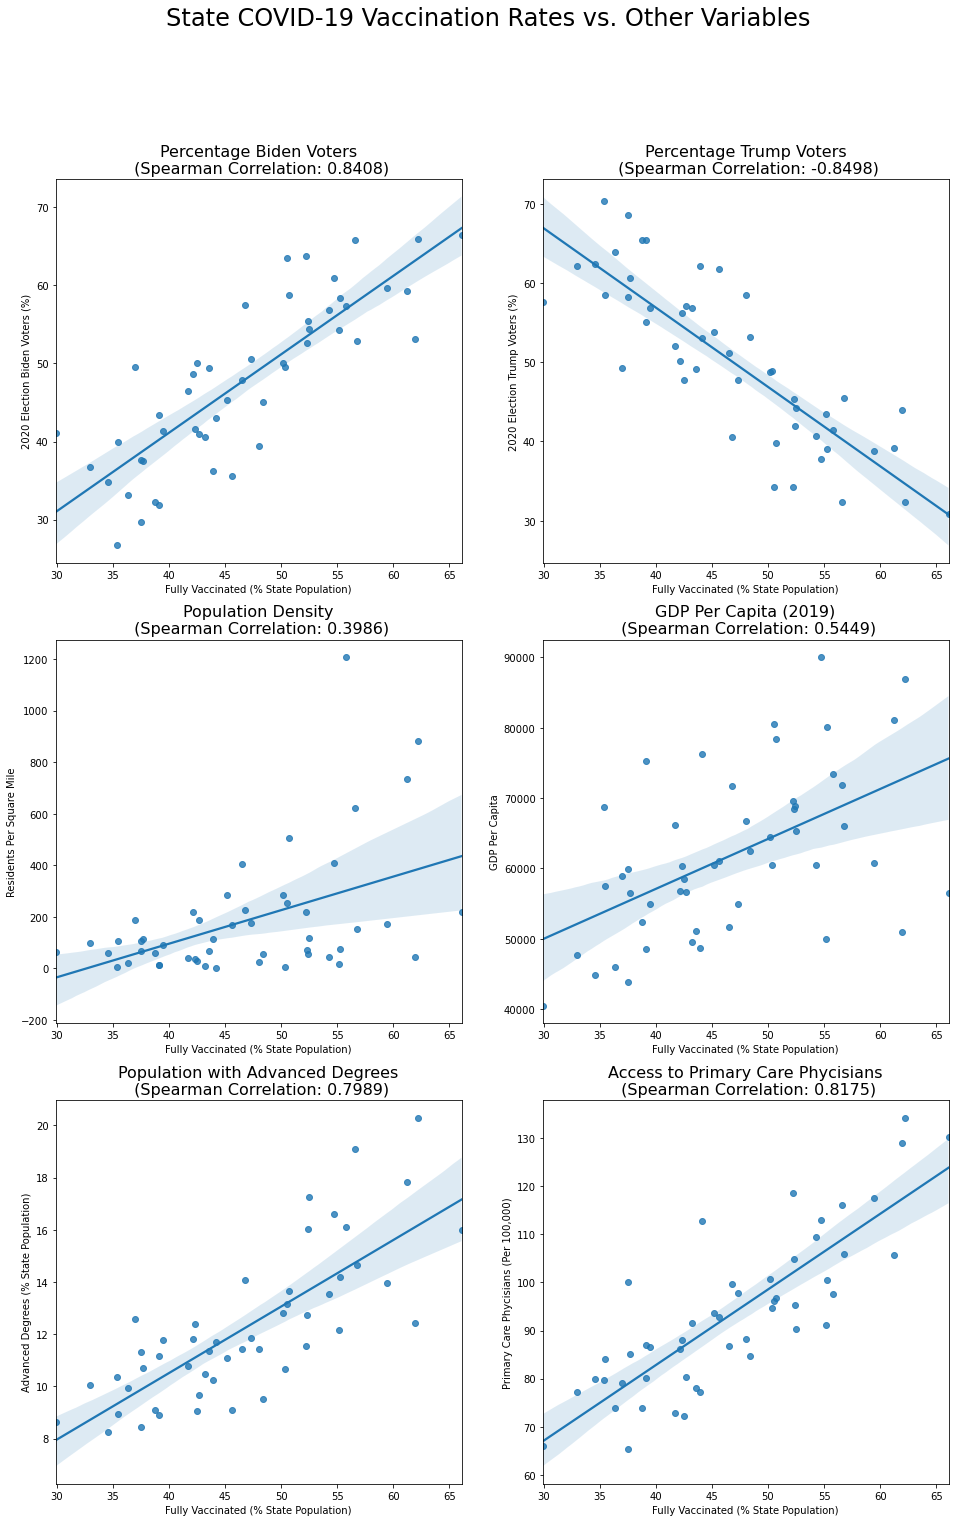

In [10]:
# Initialize figure
f, axes = plt.subplots(3, 2, figsize=(16,24))
f.suptitle("State COVID-19 Vaccination Rates vs. Other Variables", size=24)
# Set titles
axes[0][0].set_title("Percentage Biden Voters\n (Spearman Correlation: "+str(biden_correlation)+")", size = 16)
axes[0][1].set_title("Percentage Trump Voters\n (Spearman Correlation: "+str(trump_correlation)+")", size = 16)
axes[1][0].set_title("Population Density\n (Spearman Correlation: "+str(population_dens_correlation)+")", size = 16)
axes[1][1].set_title("GDP Per Capita (2019)\n (Spearman Correlation: "+str(gdp_correlation)+")", size = 16)
axes[2][0].set_title("Population with Advanced Degrees\n (Spearman Correlation: "+str(education_correlation)+")", size = 16)
axes[2][1].set_title("Access to Primary Care Phycisians\n (Spearman Correlation: "+str(pcp_correlation)+")", size = 16)
# Plot variables vs. vaccination rates
sns.regplot(y='2020 Election Biden Voters (%)', x= 'Fully Vaccinated (% State Population)', data=dataframe, ax=axes[0][0])
sns.regplot(y='2020 Election Trump Voters (%)', x= 'Fully Vaccinated (% State Population)', data=dataframe, ax=axes[0][1])
sns.regplot(y='Residents Per Square Mile', x= 'Fully Vaccinated (% State Population)', data=dataframe, ax=axes[1][0])
sns.regplot(y='GDP Per Capita', x= 'Fully Vaccinated (% State Population)', data=dataframe, ax=axes[1][1])
sns.regplot(y='Advanced Degrees (% State Population)', x= 'Fully Vaccinated (% State Population)', data=dataframe, ax=axes[2][0])
sns.regplot(y='Primary Care Phycisians (Per 100,000)', x= 'Fully Vaccinated (% State Population)', data=dataframe, ax=axes[2][1])